## Submetric: Best Playground

In [1]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
playgrounds = pd.read_csv("playground_data.csv")

# how many playgrounds are in each neighborhood?
# more entries = more playgrounds = better
playgrounds = pd.DataFrame(playgrounds['neighborhood'].value_counts())
playgrounds = playgrounds.rename(columns = {'neighborhood':'num_playgrounds'})
playgrounds

,num_playgrounds
Squirrel Hill South,32
East Liberty,26
Beechview,21
Allegheny Center,15
South Side Slopes,14
...,...
Lower Lawrenceville,2
East Carnegie,2
Bluff,2
Strip District,1


## Analyze Data

In [3]:
# Classify neighborhoods as:
# Excellent = > 25 playgrounds
# Good = > 15 playgrounds
# Okay = > 5 playgrounds
# Poor = <= 5 playgrounds
def categorize(row):
    if row['num_playgrounds'] >= 25:
        return 'excellent'
    if row['num_playgrounds'] >= 15:
        return 'good'
    if row['num_playgrounds'] >= 5:
        return 'okay'
    if row['num_playgrounds'] < 5:
        return 'poor'
    
def catPoints(row):
    if row['num_playgrounds'] >= 25:
        return 4
    if row['num_playgrounds'] >= 15:
        return 3
    if row['num_playgrounds'] >= 5:
        return 2
    if row['num_playgrounds'] < 5:
        return 1

playgrounds['categorization'] = playgrounds.apply(lambda row: categorize(row), axis=1)
playgrounds['points'] = playgrounds.apply(lambda row: catPoints(row), axis=1)
playgrounds

,num_playgrounds,categorization,points
Squirrel Hill South,32,excellent,4
East Liberty,26,excellent,4
Beechview,21,good,3
Allegheny Center,15,good,3
South Side Slopes,14,okay,2
...,...,...,...
Lower Lawrenceville,2,poor,1
East Carnegie,2,poor,1
Bluff,2,poor,1
Strip District,1,poor,1


## Plot by Number of Playgrounds

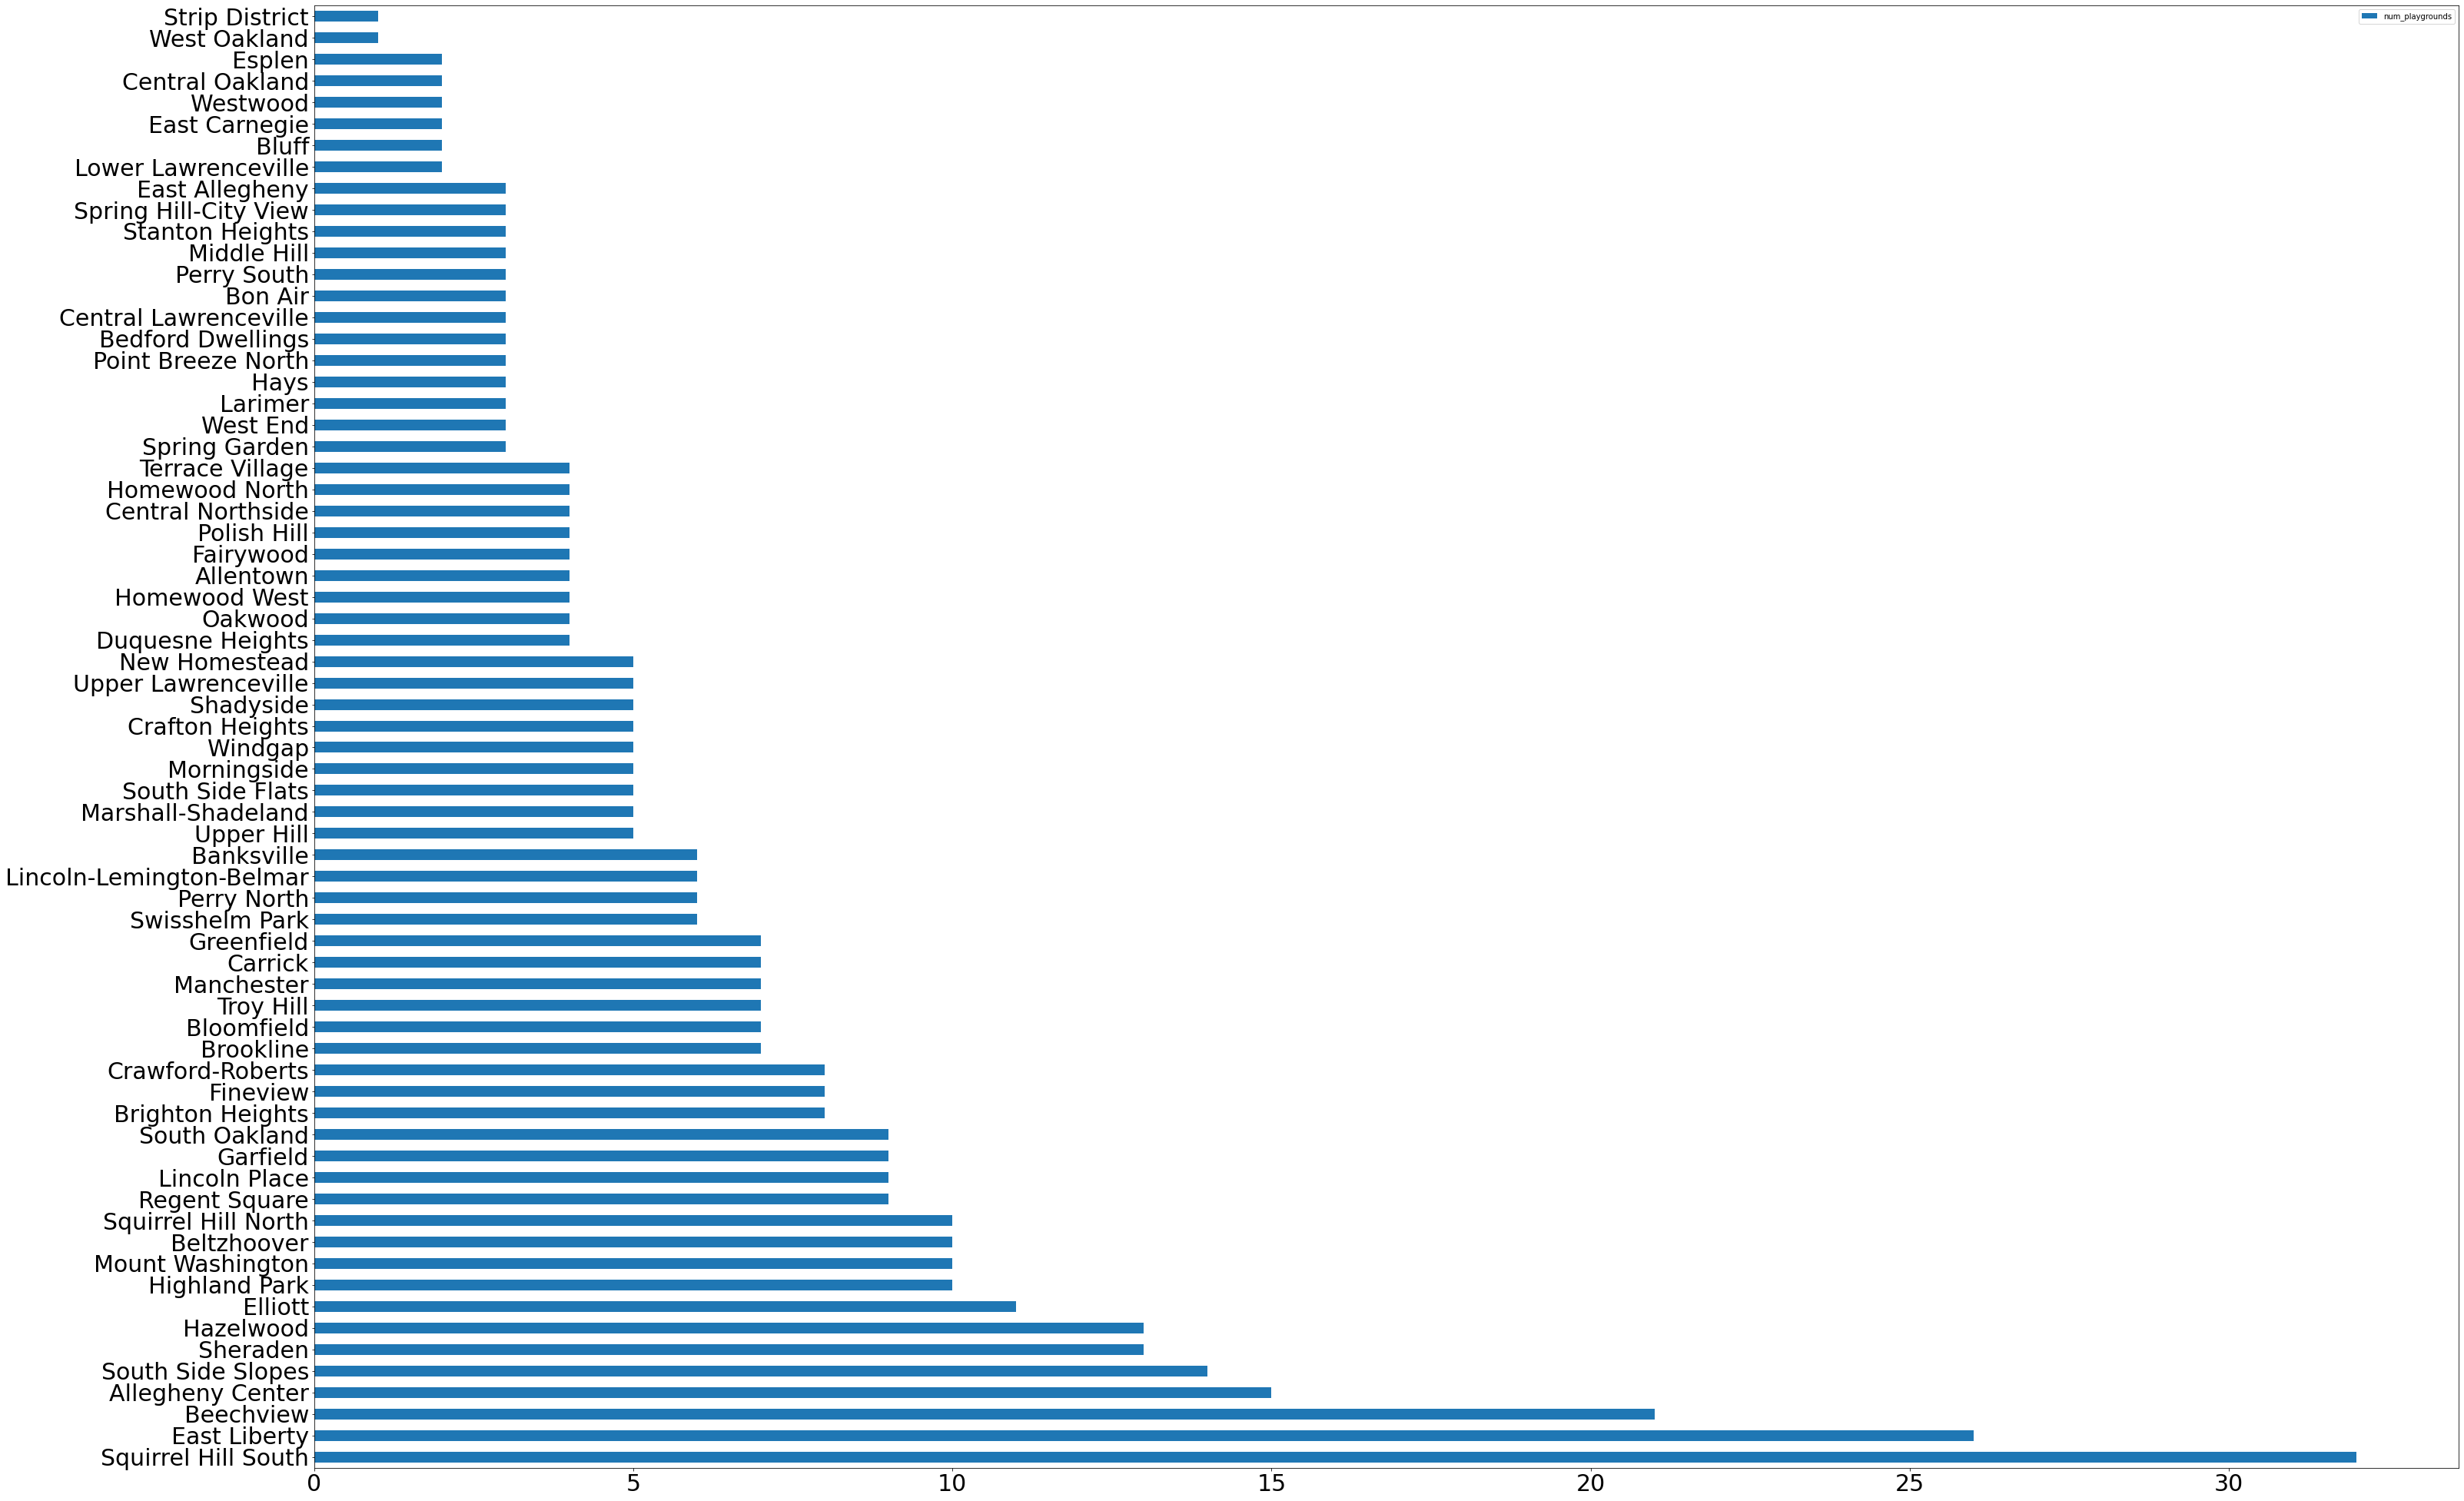

In [21]:
playgrounds.plot.barh(figsize=(50,35), fontsize=30)

## Plot by Points

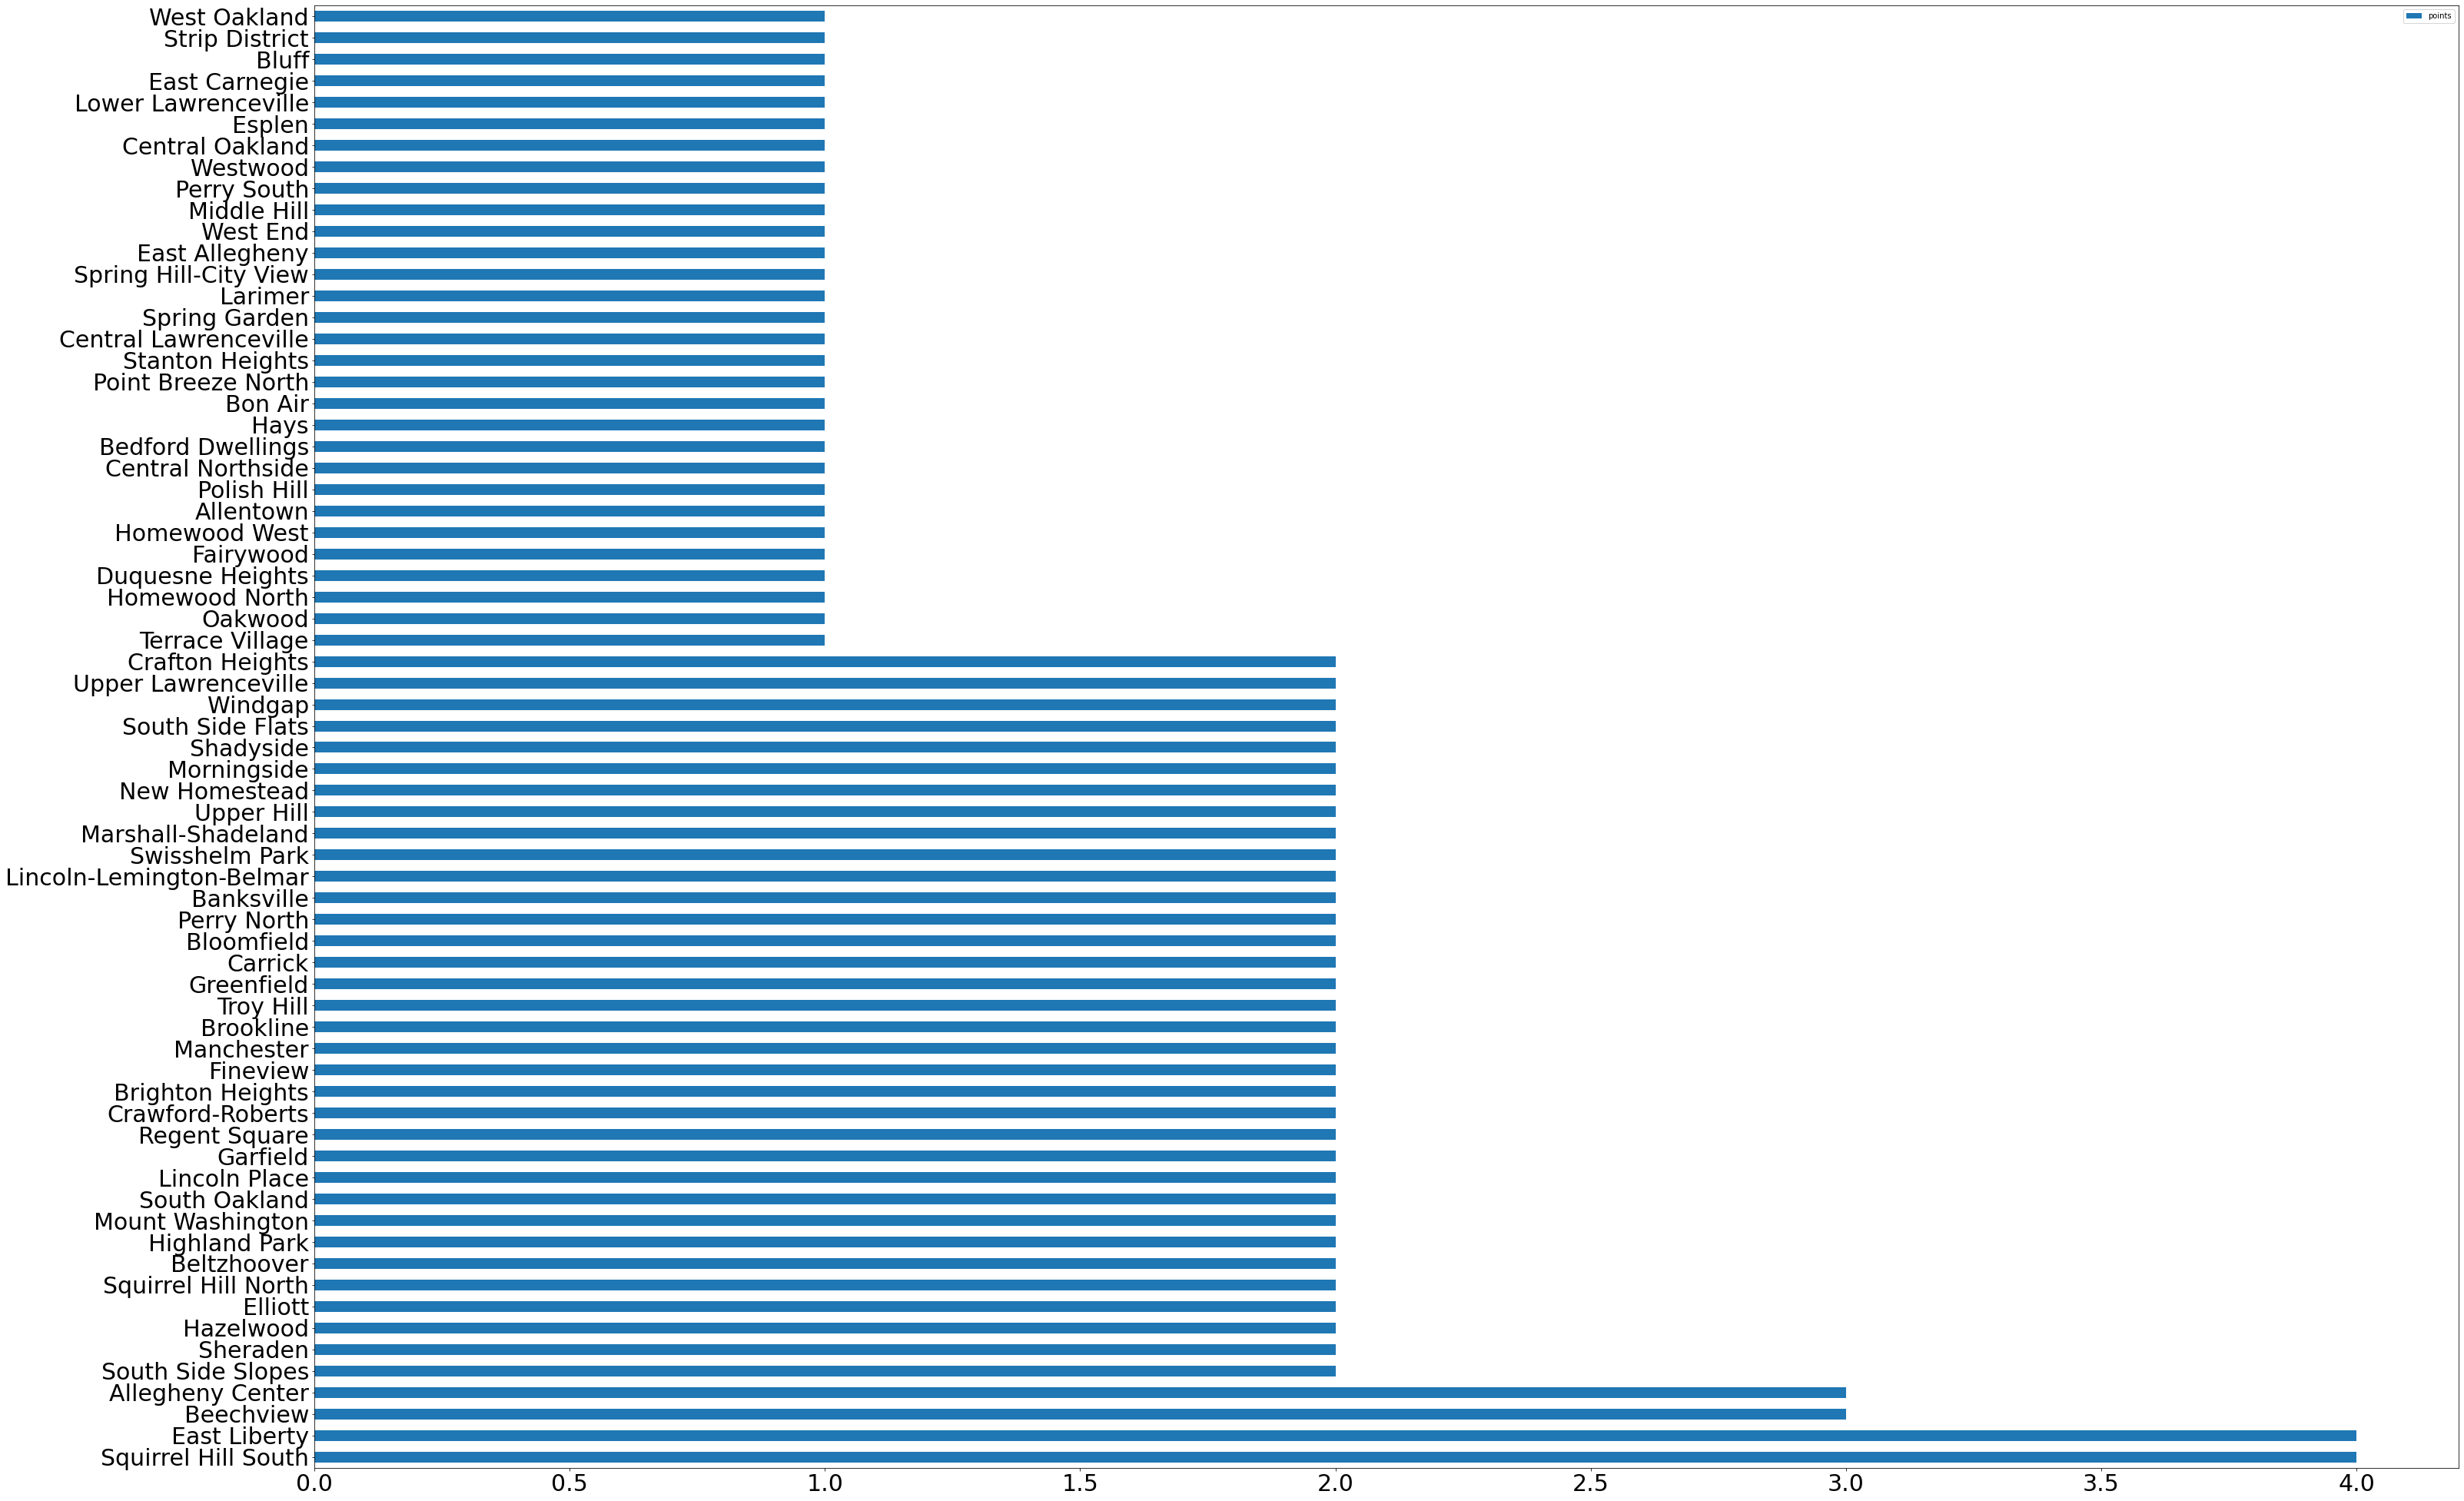

In [4]:
playgrounds.plot.barh(y='points', figsize=(50,35), fontsize=30)

## Conclusion

According to this analysis, the best neighborhood for playgrounds is tied between East Liberty and Squirrel Hill South.